# Cargo librerías



In [47]:
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos

from sklearn.decomposition import PCA #Componentes principales
from sklearn.preprocessing import StandardScaler #Escalado de datos

from sklearn.linear_model import LogisticRegression #regresión logística

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# métricas para evaluar la clasificación predicha
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# otras métricas se pueden ver acá: https://scikit-learn.org/stable/modules/model_evaluation.html#

# divide en conjuntos para entrenar y para testeat
from sklearn.model_selection import train_test_split

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (8,8)

# Datos y exploración

In [140]:
col_utiles = (0,1,2,3,4,5,6,7,8,9,11,12,13,14)
datos = np.loadtxt('./compras_online.csv',delimiter=',', usecols = col_utiles)
nombres = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region']

target = np.genfromtxt('./target.csv', delimiter=',')

# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
#print(X.shape)
#print(X[0:5,:])

# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = target
#print(y.shape)
#print(y[0:5])

numero_ceros = (y == 0).sum()
numero_unos = (y == 1).sum()
print('Hubo ventas en {} casos y no hubo ventas en {} casos'.format(numero_unos, numero_ceros))

# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
scaler = StandardScaler()
scaler.fit(X) #calcula promedio y desvío
X = scaler.transform(X) #estandariza con promedio y desvío antes calculado

Hubo ventas en 1908 casos y no hubo ventas en 10422 casos


# Clasificador Regresión Logística



In [128]:
lg = LogisticRegression() 
modelo_lg = lg.fit(X, y) 
y_pred = modelo_lg.predict(X) 


i = 0
print("Coeficientes de cada feature")
for coef in modelo_lg.coef_[0]:
    #print(nombres[i],' \t',coef)
    print( '%-23s%10s%-20.4f' % (nombres[i], '' , coef))
    i += 1

Coeficientes de cada feature
Administrative                   0.0151              
Administrative_Duration          -0.0266             
Informational                    0.0321              
Informational_Duration           0.0053              
ProductRelated                   0.1465              
ProductRelated_Duration          0.1057              
BounceRates                      -0.1333             
ExitRates                        -0.8201             
PageValues                       1.4759              
SpecialDay                       -0.1846             
OperatingSystems                 -0.0829             
Browser                          0.0511              
Region                           -0.0371             


Métricas sobre datos completos y parametros originales
Accuracy:  0.88
Recall:  0.37
Precision:  0.75
F1 score:  0.49


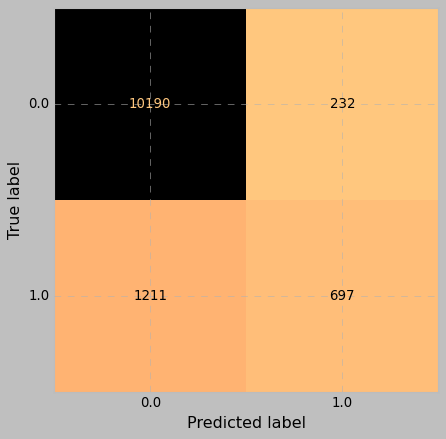

In [77]:
# matriz de confusión
conf_ori = confusion_matrix(y,y_pred)

# grafico matriz de confusión
disp_ori = ConfusionMatrixDisplay(confusion_matrix=conf_ori, display_labels=lg.classes_)
disp_ori.plot(values_format='d', colorbar=False, cmap='copper_r')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos originales.
accuracy_ori = accuracy_score(y, y_pred)
recall_ori = recall_score(y, y_pred)
precision_ori = precision_score(y, y_pred)
f1_score_ori = f1_score(y,y_pred)

print('Métricas sobre datos completos y parametros originales')
print('Accuracy: ', round(accuracy_ori,2))
print('Recall: ', round(recall_ori,2))
print('Precision: ', round(precision_ori,2))
print('F1 score: ', round(f1_score_ori,2))

# Clasificación por punto de corte arbitrario  
Vamos a probar con varios puntos de corte

Métricas sobre datos completos y punto de corte 0.8
Accuracy:  0.87
Recall:  0.22
Precision:  0.8
F1 score:  0.34


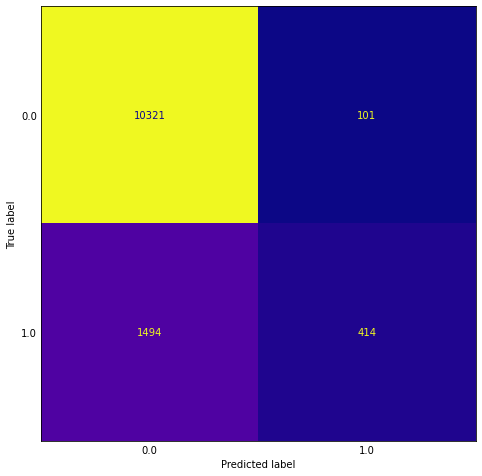

In [50]:
probas = lg.predict_proba(X) 

y_pred_08 = np.array([1 if probas[i,1] >=0.8 else 0 for i in range(len(y))])

conf_08 = confusion_matrix(y,y_pred_08)

disp_08 = ConfusionMatrixDisplay(confusion_matrix=conf_08, display_labels=lg.classes_)
disp_08.plot(values_format='d', colorbar=False, cmap='plasma')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos con punto de corte 0.8.
accuracy_08 = accuracy_score(y, y_pred_08)
recall_08 = recall_score(y, y_pred_08)
precision_08 = precision_score(y, y_pred_08)
f1_score_08 = f1_score(y,y_pred_08)

print('Métricas sobre datos completos y punto de corte 0.8')
print('Accuracy: ', round(accuracy_08,2))
print('Recall: ', round(recall_08,2))
print('Precision: ', round(precision_08,2))
print('F1 score: ', round(f1_score_08,2))

Métricas sobre datos completos y punto de corte 0.7
Accuracy:  0.88
Recall:  0.27
Precision:  0.78
F1 score:  0.4


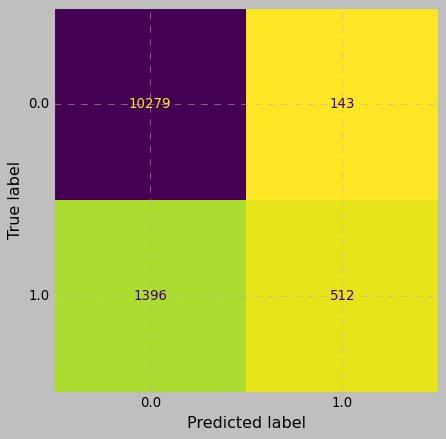

In [81]:
y_pred_07 = np.array([1 if probas[i,1] >= 0.7 else 0 for i in range(len(y))])

conf_07 = confusion_matrix(y,y_pred_07)

disp_07 = ConfusionMatrixDisplay(confusion_matrix=conf_07, display_labels=lg.classes_)
disp_07.plot(values_format='d', colorbar=False, cmap='viridis_r')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos con punto de corte 0.8.
accuracy_07 = accuracy_score(y, y_pred_07)
recall_07 = recall_score(y, y_pred_07)
precision_07 = precision_score(y, y_pred_07)
f1_score_07 = f1_score(y,y_pred_07)

print('Métricas sobre datos completos y punto de corte 0.7')
print('Accuracy: ', round(accuracy_07,2))
print('Recall: ', round(recall_07,2))
print('Precision: ', round(precision_07,2))
print('F1 score: ', round(f1_score_07,2))

Métricas sobre datos completos y punto de corte 0.4
Accuracy:  0.89
Recall:  0.44
Precision:  0.73
F1 score:  0.55


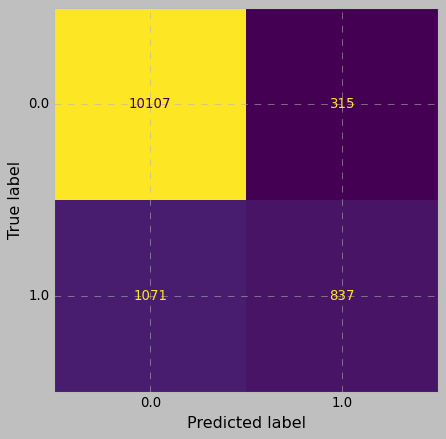

In [82]:
y_pred_04 = np.array([1 if probas[i,1] >= 0.4 else 0 for i in range(len(y))])

conf_04 = confusion_matrix(y,y_pred_04)

disp_04 = ConfusionMatrixDisplay(confusion_matrix=conf_04, display_labels=lg.classes_)
disp_04.plot(values_format='d', colorbar=False, cmap='viridis')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos con punto de corte 0.4.
accuracy_04 = accuracy_score(y, y_pred_04)
recall_04 = recall_score(y, y_pred_04)
precision_04 = precision_score(y, y_pred_04)
f1_score_04 = f1_score(y,y_pred_04)

print('Métricas sobre datos completos y punto de corte 0.4')
print('Accuracy: ', round(accuracy_04,2))
print('Recall: ', round(recall_04,2))
print('Precision: ', round(precision_04,2))
print('F1 score: ', round(f1_score_04,2))

# Visualizar resultados por Componentes principales

In [54]:
# Vamos a probar con PCA
# Creamos el objeto que aloja los metodos para transformar a Componentes Principales
pca = PCA()

# Ajustamos ese modelo a nuestras features y target
pca.fit(X,y)

# Aplicamos ese modelo ajustado a nuestras features y obtenemos la prediccion del target 
x_new = pca.transform(X)


In [55]:
# Varianza explicada por cada componente
var_pc = pca.explained_variance_ratio_
#print(var_pc)

# Recorremos var_pc y mostramos su contribucion a la varianza
indice = 1
for var in var_pc:
    print("PCA{:2} : {:6.4f}".format(indice, round(var,4)))
    indice += 1

PCA 1 : 0.2617
PCA 2 : 0.1293
PCA 3 : 0.0985
PCA 4 : 0.0828
PCA 5 : 0.0777
PCA 6 : 0.0738
PCA 7 : 0.0715
PCA 8 : 0.0703
PCA 9 : 0.0595
PCA10 : 0.0324
PCA11 : 0.0270
PCA12 : 0.0094
PCA13 : 0.0060


Las dos primeras PC explican el 38% de los datos

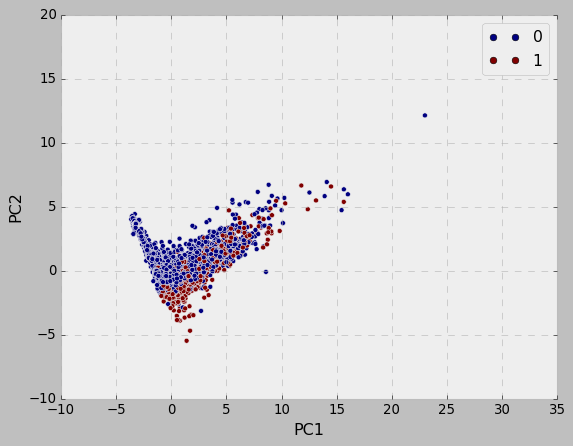

In [65]:
# le damos un estilo a nuestro grafico
plt.style.use('bmh')

# asignamos los dos primeros PC a los ejes coordinados
x_valor = x_new[:,0]
y_valor = x_new[:,1]

# hacemos un grafico de dispersion
dispersion_1 = plt.scatter(x_valor, y_valor , c=y)

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# mostramos la leyend
plt.legend(handles=dispersion_1.legend_elements()[0], labels=dispersion_1.legend_elements()[1], fontsize=14)

# imprimimos el grafico completo
plt.show();

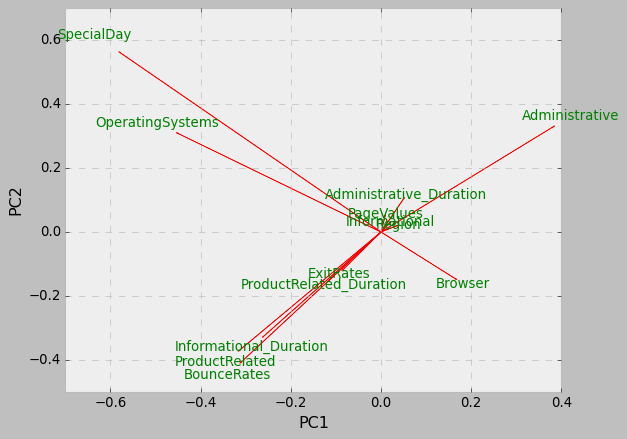

In [68]:
# Definimos el rango de los ejes del grafico
plt.axis([-0.7,0.4,-0.5,0.7])

# Vemos cuantos vectores son las direcciones de maxima varianza
n = pca.components_.shape[0]

# Recorremos esos vectores y los vamos dibujando en el plano
for i in range(n):
    plt.arrow(0, 0, pca.components_[i,0], pca.components_[i,1], color = 'r', alpha = 1);
    # En el extremo de cada vector ponemos en nombre de la columan correspondiente (un poco dezplazados)
    plt.text(pca.components_[i,0]*1.1 , pca.components_[i,1]*1.1, nombres[i], color = 'g', ha = 'center', va = 'center', fontsize=12);

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# imprimimos el grafico completo
plt.show();

# ¿No era que había que evaluar al modelo en datos nuevos?

### Sí, para esto se hace el _train/test split_:

## Separación de los datos en dos conjuntos **disjuntos**:

- Datos de entrenamiento (train): se usan para construir el modelo predictor.
- Datos de testeo (test): se usan para evaluar el modelo predictor.

### Separaciones usuales: 70/30 u 80/20 % entre train y test.

Métricas sobre datos nuevos de TEST
Accuracy:  0.78
Recall:  0.9
Precision:  0.75
f1 score:  0.51


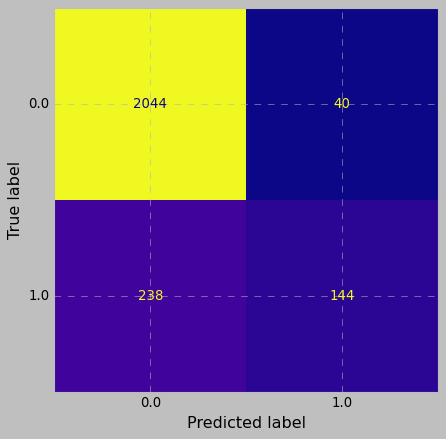

In [132]:
# Separo en train/test. El stratify es para conservar el balance de clases.
# El random state es para que siemnpre sea el mismo split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=999979)

#instancio la clase
lg_split = LogisticRegression() 

#entreno modelo predictivo a partir de los datos de ENTRENAMIENTO
modelo_lg_split = lg_split.fit(X_train, y_train) 

# clasifico según el modelo, es decir hago una prediccion con los datos de TESTEO.
y_pred_test = modelo_lg_split.predict(X_test) 

# matriz de confusión: comparo clases reales vs. clases predichas con los datos de TESTEO.
conf_split = confusion_matrix(y_test,y_pred_test)

# grafico matriz de confusión
disp_split = ConfusionMatrixDisplay(confusion_matrix=conf_split, display_labels=lg2.classes_)
disp_split.plot(values_format='d', colorbar=False, cmap='plasma')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos de TESTEO.
accuracy_sp = accuracy_score(y_test, y_pred_test)
recall_sp = recall_score(y_test, y_pred_test)
precision_sp = precision_score(y_test, y_pred_test)
f1_score_sp = f1_score(y_test,y_pred_test)

print('Métricas sobre datos nuevos de TEST')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('f1 score: ', round(f1_score_sp,2))

In [133]:
i = 0
print("Coeficientes de cada feature")
for coef in modelo_lg_split.coef_[0]:
    #print(nombres[i],' \t',coef)
    print( '%-23s%10s%-20.4f' % (nombres[i], '' , coef))
    i += 1

Coeficientes de cada feature
Administrative                   -0.0014             
Administrative_Duration          -0.0266             
Informational                    0.0135              
Informational_Duration           0.0262              
ProductRelated                   0.1641              
ProductRelated_Duration          0.0848              
BounceRates                      -0.1555             
ExitRates                        -0.8864             
PageValues                       1.4572              
SpecialDay                       -0.1304             
OperatingSystems                 -0.0689             
Browser                          0.0476              
Region                           -0.0250             


### Clasificacion por corte arbitrario
Nuevamente vamos a probar las metricas cambiando el punto de corte desde el estandard 0.5

Métricas sobre datos completos y punto de corte 0.8
Accuracy:  0.87
Recall:  0.22
Precision:  0.8
F1 score:  0.34


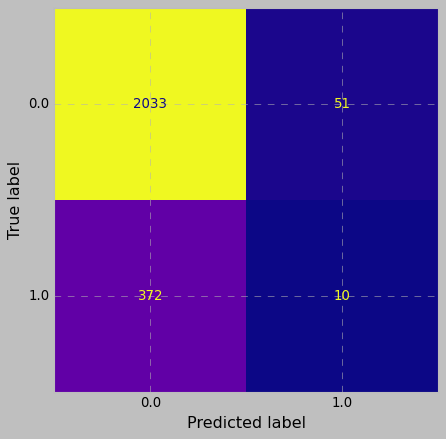

In [134]:
probas_split = lg_split.predict_proba(X) 

y_pred_sp_08 = np.array([1 if probas_split[i,1] >=0.8 else 0 for i in range(len(y_test))])

conf_sp_08 = confusion_matrix(y_test,y_pred_sp_08)

disp_sp_08 = ConfusionMatrixDisplay(confusion_matrix=conf_sp_08, display_labels=lg.classes_)
disp_sp_08.plot(values_format='d', colorbar=False, cmap='plasma')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos con punto de corte 0.8.
accuracy_sp_08 = accuracy_score(y_test, y_pred_sp_08)
recall_sp_08 = recall_score(y_test, y_pred_sp_08)
precision_sp_08 = precision_score(y_test, y_pred_sp_08)
f1_score_sp_08 = f1_score(y_test,y_pred_sp_08)

print('Métricas sobre datos completos y punto de corte 0.8')
print('Accuracy: ', round(accuracy_08,2))
print('Recall: ', round(recall_08,2))
print('Precision: ', round(precision_08,2))
print('F1 score: ', round(f1_score_08,2))

Métricas sobre datos completos y punto de corte 0.7
Accuracy:  0.82
Recall:  0.03
Precision:  0.17
F1 score:  0.06


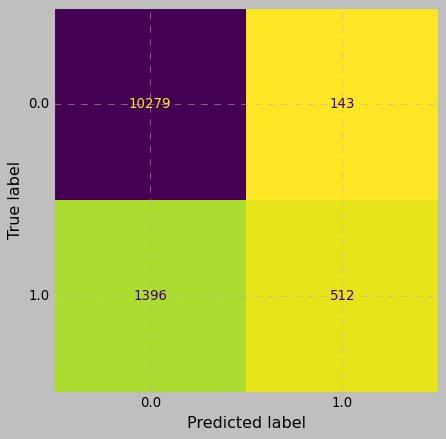

In [136]:
y_pred_sp_07 = np.array([1 if probas_split[i,1] >= 0.7 else 0 for i in range(len(y_test))])

conf_sp_07 = confusion_matrix(y,y_pred_07)

disp_sp_07 = ConfusionMatrixDisplay(confusion_matrix=conf_sp_07, display_labels=lg.classes_)
disp_sp_07.plot(values_format='d', colorbar=False, cmap='viridis_r')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos con punto de corte 0.8.
accuracy_sp_07 = accuracy_score(y_test, y_pred_sp_07)
recall_sp_07 = recall_score(y_test, y_pred_sp_07)
precision_sp_07 = precision_score(y_test, y_pred_sp_07)
f1_score_sp_07 = f1_score(y_test,y_pred_sp_07)

print('Métricas sobre datos completos y punto de corte 0.7')
print('Accuracy: ', round(accuracy_sp_07,2))
print('Recall: ', round(recall_sp_07,2))
print('Precision: ', round(precision_sp_07,2))
print('F1 score: ', round(f1_score_sp_07,2))

Métricas sobre datos completos y punto de corte 0.4
Accuracy:  0.81
Recall:  0.07
Precision:  0.18
F1 score:  0.1


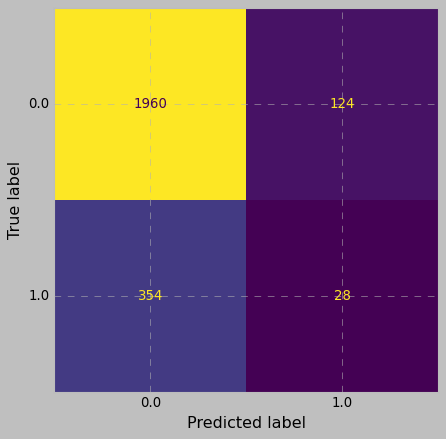

In [137]:
y_pred_sp_04 = np.array([1 if probas_split[i,1] >= 0.4 else 0 for i in range(len(y_test))])

conf_sp_04 = confusion_matrix(y_test,y_pred_sp_04)

disp_sp_04 = ConfusionMatrixDisplay(confusion_matrix=conf_sp_04, display_labels=lg.classes_)
disp_sp_04.plot(values_format='d', colorbar=False, cmap='viridis')
plt.tick_params(axis=u'both', which=u'both',length=0)

# métricas de evaluación sobre los datos con punto de corte 0.4.
accuracy_sp_04 = accuracy_score(y_test, y_pred_sp_04)
recall_sp_04 = recall_score(y_test, y_pred_sp_04)
precision_sp_04 = precision_score(y_test, y_pred_sp_04)
f1_score_sp_04 = f1_score(y_test,y_pred_sp_04)

print('Métricas sobre datos completos y punto de corte 0.4')
print('Accuracy: ', round(accuracy_sp_04,2))
print('Recall: ', round(recall_sp_04,2))
print('Precision: ', round(precision_sp_04,2))
print('F1 score: ', round(f1_score_sp_04,2))